In [7]:
%pip install hvplot seaborn matplotlib numpy statsmodels scikit-learn scipy --quiet

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import hvplot.pandas
import hvplot as hv
import seaborn as sns
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
import numpy as np
import sklearn
from sklearn.impute import SimpleImputer
import statsmodels as sm

print(f'''
pandas -> {pd.__version__}
numpy -> {np.__version__}
matplotlob -> {matplotlib.__version__}
statsmodels -> {sm.__version__}
scikit-learn -> {sklearn.__version__}
''')


pandas -> 2.0.1
numpy -> 1.24.3
matplotlob -> 3.7.1
statsmodels -> 0.14.0
scikit-learn -> 1.2.2



In [2]:
def read_dataset(folder, file, date_col=None):
    '''
    folder: is a Path object
    file: the CSV filename in that Path object. 
    date_col: specify a date_col to use as index_col 
    
    returns: a pandas DataFrame with a DatetimeIndex
    '''
    df = pd.read_csv(folder / file, 
                     index_col=date_col, 
                     parse_dates=[date_col])
    return df

In [3]:
def plot_dfs(df1, df2, col, title=None, xlabel=None, ylabel=None):
    '''	
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data
    '''    
    df_missing = df2.rename(columns={col: 'missing'})
    
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    subplots_size = len(columns)
    
    # subplots_size = df2.shape[1]
    fig, ax = plt.subplots(subplots_size+1, 1, sharex=True)
    plt.subplots_adjust(hspace=0.25)
    fig.suptitle = title 
    
    df1[col].plot(ax=ax[0], figsize=(10, 16))
    ax[0].set_title('Original Dataset')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)    
    
    for i, colname in enumerate(columns):
        df_missing[colname].plot(ax=ax[i+1])
        ax[i+1].set_title(colname)

    plt.show()


In [4]:
def rmse_score(df1, df2, col=None):
    '''
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data

    returns: a list of scores
    '''
    df_missing = df2.rename(columns={col: 'missing'})
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    scores = []
    for comp_col in columns[1:]:
        rmse = np.sqrt(np.mean((df1[col] - df_missing[comp_col])**2))
        scores.append(rmse)
        print(f'RMSE for {comp_col}: {rmse}')
    return scores


In [5]:
folder = Path('./Data/')

In [6]:
missing_df = read_dataset(folder,'machine_temp_failure_missing.csv','timestamp' )
original_df = read_dataset(folder,'machine_temp_failure_original.csv','timestamp')

In [7]:
missing_df.shape

(22695, 1)

In [8]:
original_df.shape

(22695, 1)

In [9]:
missing_df.rename(columns = {'value':'temperature'}, inplace = True)
original_df.rename(columns = {'value':'temperature'}, inplace = True)


In [10]:
missing_df.index = pd.to_datetime(missing_df.index, format='%d-%m-%Y %H:%M')


In [11]:
type(missing_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [12]:
missing_df.isnull().values.any()

True

In [13]:
missing_df.isnull().sum()

temperature    1285
dtype: int64

In [14]:
missing_df.describe(include='all')

temperature
count  21410.000000
mean      85.968188
std       13.553070
min        2.084721
25%       83.082867
50%       89.251290
75%       93.910748
max      108.510543

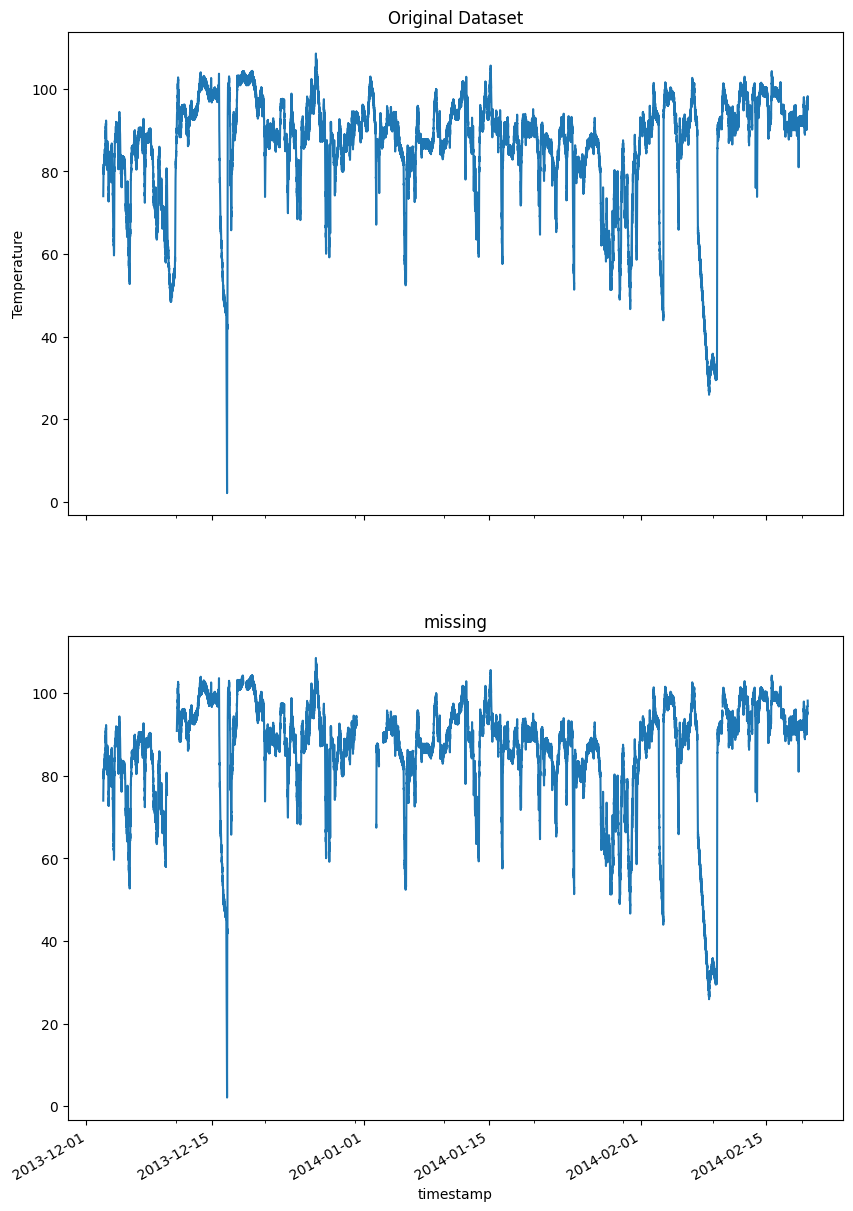

In [15]:
plot_dfs(original_df,missing_df,'temperature',title='Temperature data',xlabel='Timestamp',ylabel='Temperature')

In [16]:
missing_df['Prev_temperature']=missing_df['temperature'].shift(1)
missing_df['delta_temperature']=missing_df['temperature']-missing_df['Prev_temperature']

In [17]:
index = missing_df.index
print(index)

DatetimeIndex(['2013-12-02 21:15:00', '2013-12-02 21:20:00',
               '2013-12-02 21:25:00', '2013-12-02 21:30:00',
               '2013-12-02 21:35:00', '2013-12-02 21:40:00',
               '2013-12-02 21:45:00', '2013-12-02 21:50:00',
               '2013-12-02 21:55:00', '2013-12-02 22:00:00',
               ...
               '2014-02-19 14:40:00', '2014-02-19 14:45:00',
               '2014-02-19 14:50:00', '2014-02-19 14:55:00',
               '2014-02-19 15:00:00', '2014-02-19 15:05:00',
               '2014-02-19 15:10:00', '2014-02-19 15:15:00',
               '2014-02-19 15:20:00', '2014-02-19 15:25:00'],
              dtype='datetime64[ns]', name='timestamp', length=22695, freq=None)


In [18]:
missing_df.drop(['Prev_temperature'],axis=1)

temperature  delta_temperature
timestamp                                          
2013-12-02 21:15:00    73.967322                NaN
2013-12-02 21:20:00    74.935882           0.968560
2013-12-02 21:25:00    76.124162           1.188280
2013-12-02 21:30:00    78.140707           2.016546
2013-12-02 21:35:00    79.329836           1.189128
...                          ...                ...
2014-02-19 15:05:00    98.185415                NaN
2014-02-19 15:10:00    97.804168          -0.381246
2014-02-19 15:15:00    97.135468          -0.668700
2014-02-19 15:20:00    98.056852           0.921384
2014-02-19 15:25:00    96.903861          -1.152991

[22695 rows x 2 columns]

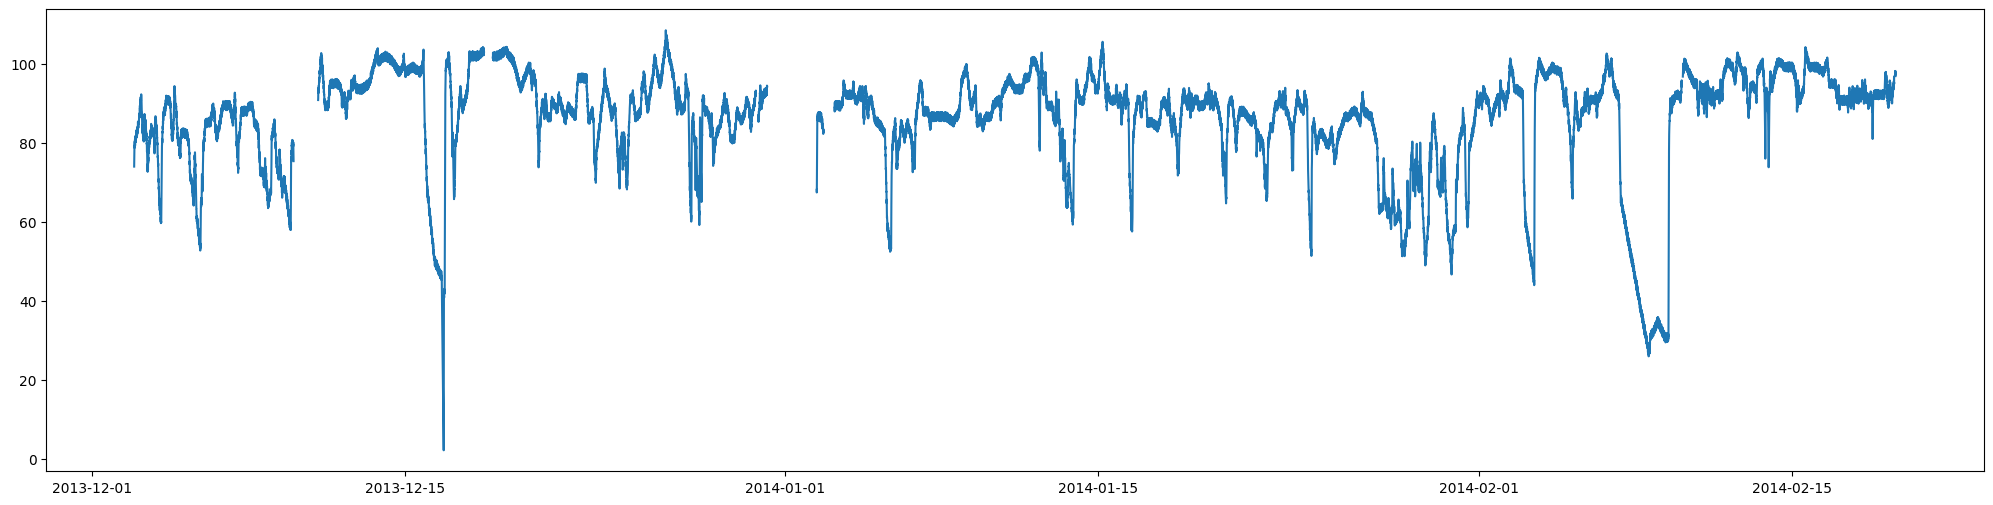

In [19]:
plt.figure(figsize=(25,6))
plt.plot(missing_df['temperature'])
plt.show()

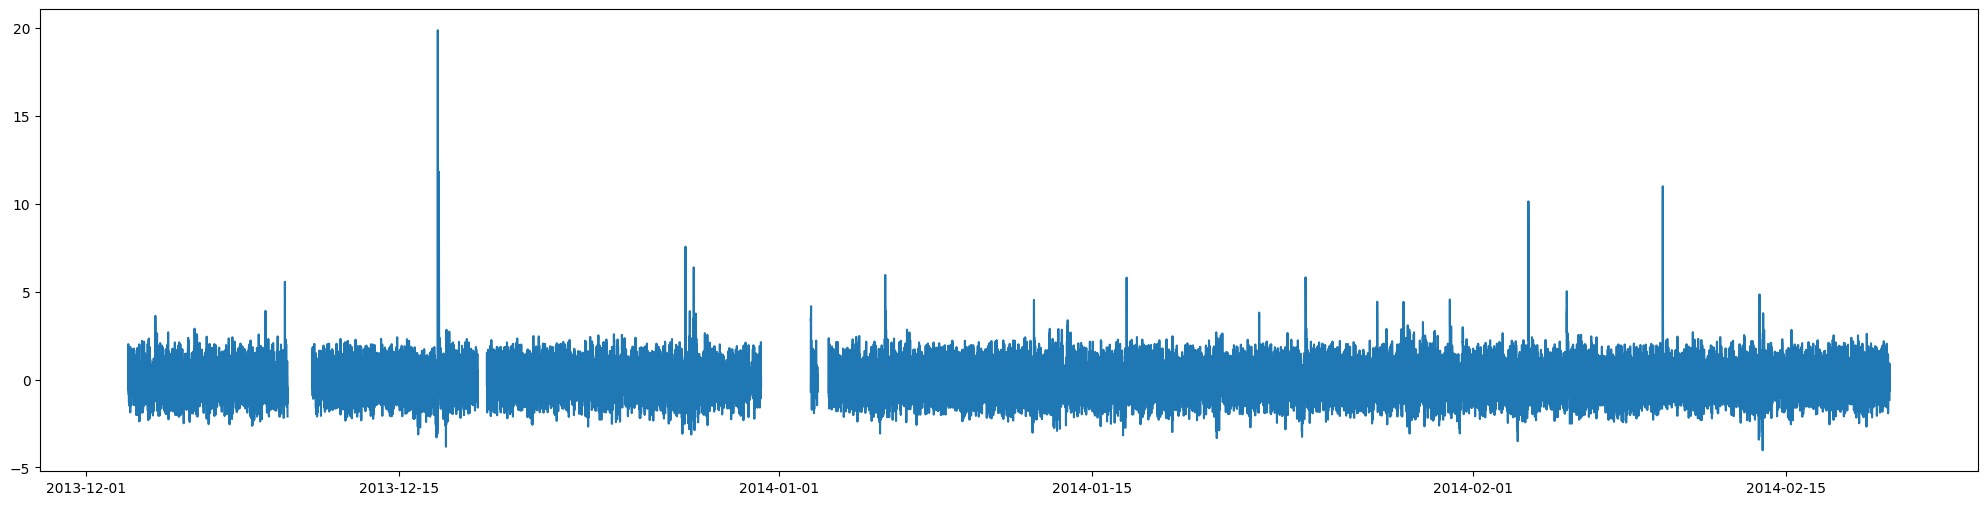

In [20]:
plt.figure(figsize=(25,6))
plt.plot(missing_df['delta_temperature'])
plt.show()

In [21]:
plot_1 = missing_df.hvplot(title = 'hv plot')
plot_1

:NdOverlay   [Variable]
   :Curve   [timestamp]   (value)

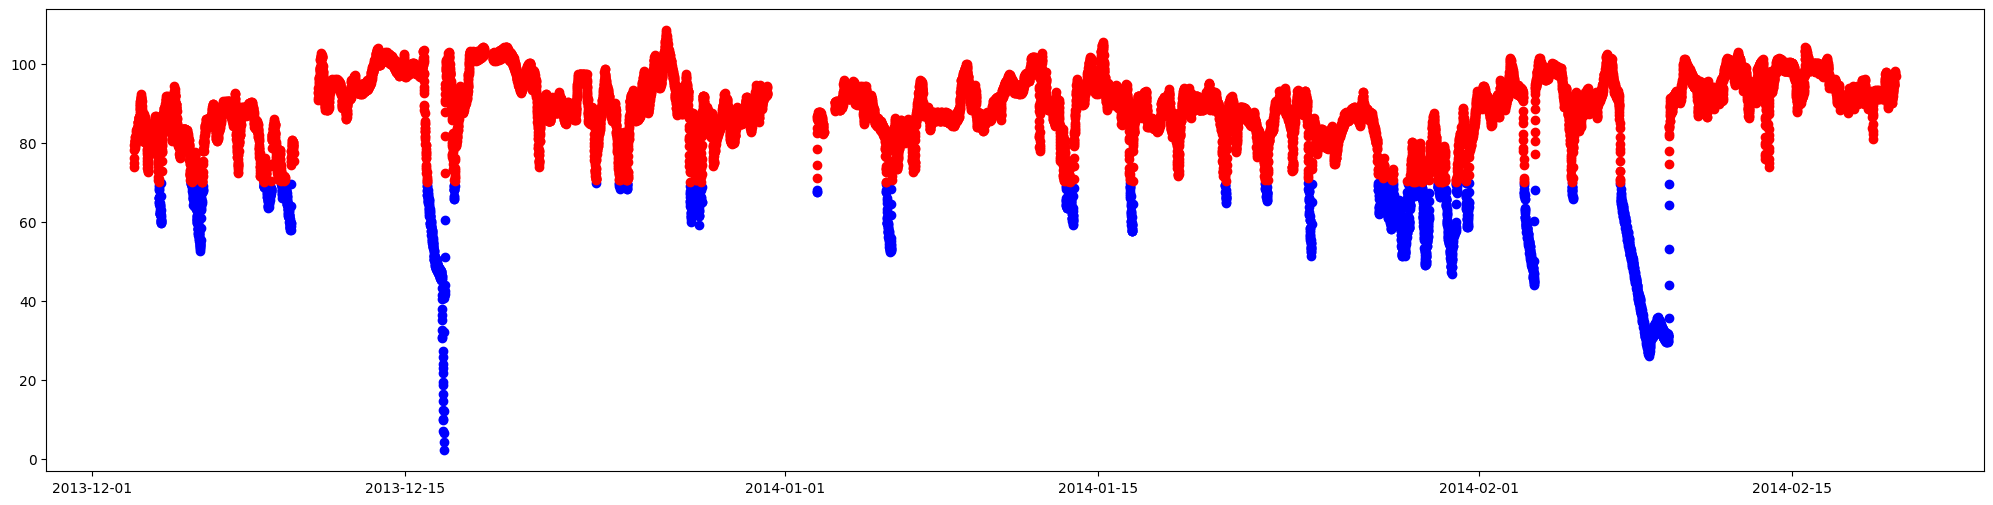

In [22]:
above_70 = missing_df[missing_df['temperature'] > 70.00]
below_70 = missing_df[missing_df['temperature'] <= 70.00]

plt.figure(figsize=(25,6))
plt.scatter(below_70.index,below_70['temperature'],color='blue')
plt.scatter(above_70.index,above_70['temperature'],color='red')

plt.show()


In [23]:
missing_df['ffil'] = missing_df['temperature'].fillna(method='ffill')
missing_df['bfill'] = missing_df['temperature'].fillna(method='bfill')
missing_df['mean'] = missing_df['temperature'].fillna(missing_df['temperature'].mean())

In [24]:
strategy = [
    ('Mean Strategy', 'mean'),
    ('Median Strategy', 'median'),
    ('Most Frequent Strategy', 'most_frequent')]

In [25]:
missing_vals = missing_df['temperature'].values.reshape(-1,1)

for s_name, s in strategy:
    missing_df[s_name] = (
        SimpleImputer(strategy=s).fit_transform(missing_vals))

In [26]:
interpolations = [
    'linear',
    'nearest',
]

for intp in interpolations:
    missing_df[intp] = missing_df['temperature'].interpolate(method=intp)

In [27]:
_ = rmse_score(original_df, missing_df, 'temperature')

RMSE for Prev_temperature: 1.0793400866793466
RMSE for delta_temperature: 87.02576617592636
RMSE for ffil: 2.4939956524274454
RMSE for bfill: 5.873128567455812
RMSE for mean: 3.961536496226712
RMSE for Mean Strategy: 3.961536496226712
RMSE for Median Strategy: 4.071585793081295
RMSE for Most Frequent Strategy: 20.176855010139285
RMSE for linear: 4.043203597694257
RMSE for nearest: 4.538509533797259


The lowest rmse score was for ffil method.

In [28]:
missing_df.describe()

temperature  Prev_temperature  delta_temperature          ffil   
count  21410.000000      21409.000000       21380.000000  22695.000000  \
mean      85.968188         85.967677           0.001373     86.128962   
std       13.553070         13.553180           1.079301     13.363404   
min        2.084721          2.084721          -4.025135      2.084721   
25%       83.082867         83.082147          -0.744851     82.751587   
50%       89.251290         89.250502          -0.011536     89.425445   
75%       93.910748         93.910436           0.729413     94.204409   
max      108.510543        108.510543          19.881322    108.510543   

              bfill          mean  Mean Strategy  Median Strategy   
count  22695.000000  22695.000000   22695.000000     22695.000000  \
mean      85.645915     85.968188      85.968188        86.154078   
std       13.571443     13.163771      13.163771        13.185623   
min        2.084721      2.084721       2.084721         2.084721   
25%       82.403528     83.638778      83.638778        83.638778   
50%       89.121578     88.700228      88.700228        89.251290   
75%       93.683583     93.485333      93.485333        93.485333   
max      108.510543    108.510543     108.510543       108.510543   

       Most Frequent Strategy        linear       nearest  
count            22695.000000  22695.000000  22695.000000  
mean                81.218672     85.887438     85.887706  
std                 23.433936     13.328446     13.469924  
min                  2.084721      2.084721      2.084721  
25%                 80.890984     82.640382     82.696016  
50%                 88.700228     88.988892     89.267129  
75%                 93.485333     93.703383     94.083684  
max                108.510543    108.510543    108.510543

In [29]:
missing_df.head()

temperature  Prev_temperature  delta_temperature   
timestamp                                                               
2013-12-02 21:15:00    73.967322               NaN                NaN  \
2013-12-02 21:20:00    74.935882         73.967322           0.968560   
2013-12-02 21:25:00    76.124162         74.935882           1.188280   
2013-12-02 21:30:00    78.140707         76.124162           2.016546   
2013-12-02 21:35:00    79.329836         78.140707           1.189128   

                          ffil      bfill       mean  Mean Strategy   
timestamp                                                             
2013-12-02 21:15:00  73.967322  73.967322  73.967322      73.967322  \
2013-12-02 21:20:00  74.935882  74.935882  74.935882      74.935882   
2013-12-02 21:25:00  76.124162  76.124162  76.124162      76.124162   
2013-12-02 21:30:00  78.140707  78.140707  78.140707      78.140707   
2013-12-02 21:35:00  79.329836  79.329836  79.329836      79.329836   

                     Median Strategy  Most Frequent Strategy     linear   
timestamp                                                                 
2013-12-02 21:15:00        73.967322               73.967322  73.967322  \
2013-12-02 21:20:00        74.935882               74.935882  74.935882   
2013-12-02 21:25:00        76.124162               76.124162  76.124162   
2013-12-02 21:30:00        78.140707               78.140707  78.140707   
2013-12-02 21:35:00        79.329836               79.329836  79.329836   

                       nearest  
timestamp                       
2013-12-02 21:15:00  73.967322  
2013-12-02 21:20:00  74.935882  
2013-12-02 21:25:00  76.124162  
2013-12-02 21:30:00  78.140707  
2013-12-02 21:35:00  79.329836

In [30]:
new_df = missing_df[['ffil']].copy()
new_df.describe()

ffil
count  22695.000000
mean      86.128962
std       13.363404
min        2.084721
25%       82.751587
50%       89.425445
75%       94.204409
max      108.510543

In [31]:
print(new_df)

                          ffil
timestamp                     
2013-12-02 21:15:00  73.967322
2013-12-02 21:20:00  74.935882
2013-12-02 21:25:00  76.124162
2013-12-02 21:30:00  78.140707
2013-12-02 21:35:00  79.329836
...                        ...
2014-02-19 15:05:00  98.185415
2014-02-19 15:10:00  97.804168
2014-02-19 15:15:00  97.135468
2014-02-19 15:20:00  98.056852
2014-02-19 15:25:00  96.903861

[22695 rows x 1 columns]


In [32]:
new_df.rename(columns = {'ffil':'temp_filled'}, inplace = True)
print(new_df)

                     temp_filled
timestamp                       
2013-12-02 21:15:00    73.967322
2013-12-02 21:20:00    74.935882
2013-12-02 21:25:00    76.124162
2013-12-02 21:30:00    78.140707
2013-12-02 21:35:00    79.329836
...                          ...
2014-02-19 15:05:00    98.185415
2014-02-19 15:10:00    97.804168
2014-02-19 15:15:00    97.135468
2014-02-19 15:20:00    98.056852
2014-02-19 15:25:00    96.903861

[22695 rows x 1 columns]


In [33]:
resampled = new_df.resample('H').mean()

In [34]:
resampled.head()

temp_filled
timestamp                       
2013-12-02 21:00:00    78.011596
2013-12-02 22:00:00    80.598012
2013-12-02 23:00:00    81.625018
2013-12-03 00:00:00    82.965454
2013-12-03 01:00:00    84.529097

In [35]:
resampled.describe()

temp_filled
count  1891.000000
mean     86.126685
std      13.291729
min      20.641281
25%      82.751587
50%      89.476799
75%      94.204409
max     106.303664

<Axes: xlabel='temp_filled'>

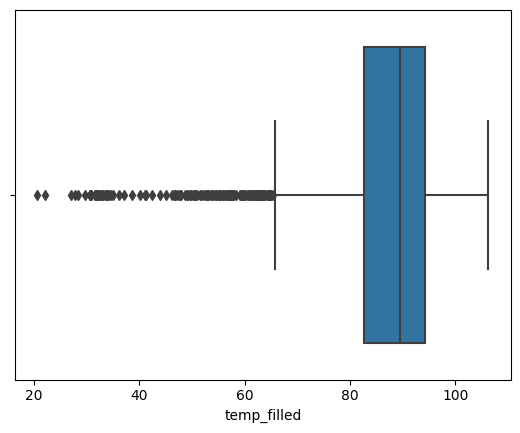

In [36]:
sns.boxplot(x=resampled['temp_filled'], whis=1.5)

<Axes: xlabel='temp_filled'>

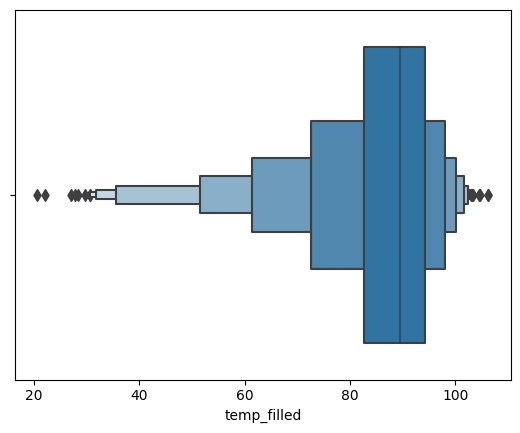

In [37]:
sns.boxenplot(x=resampled['temp_filled'])

In [38]:
from pandas.plotting import lag_plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

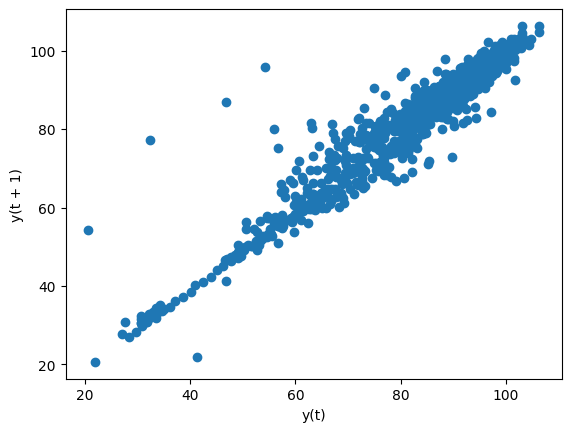

In [39]:
lag_plot(resampled,lag=1)

In [40]:
def iqr_outliers(data):
    q1, q3 = np.percentile(data, [25, 75])
    IQR = q3 - q1
    lower_fence = q1 - (1.5 * IQR)
    upper_fence = q3 + (1.5 * IQR)
    return data[(data.temp_filled > upper_fence) | (data.temp_filled < lower_fence)]

In [41]:
outliers = iqr_outliers(resampled)
print(outliers)

                     temp_filled
timestamp                       
2013-12-04 00:00:00    64.696206
2013-12-04 01:00:00    61.532599
2013-12-05 16:00:00    61.150198
2013-12-05 17:00:00    59.192719
2013-12-05 18:00:00    57.223873
...                          ...
2014-02-09 07:00:00    30.880488
2014-02-09 08:00:00    30.632596
2014-02-09 09:00:00    30.583324
2014-02-09 10:00:00    30.641056
2014-02-09 11:00:00    32.311358

[156 rows x 1 columns]


In [42]:
outliers.describe()

temp_filled
count   156.000000
mean     51.543609
std      11.825618
min      20.641281
25%      45.985438
50%      55.289581
75%      61.157770
max      65.376598

The outliers range from 20 to 65, which means the rest temperature values from 66 to 108 constitute the majority of observed data. An interesting observation is that the value of the outliers are lower that the frequent temperature values. The 'out of trend' points in the dataset are the lower ones. 

In [43]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156 entries, 2013-12-04 00:00:00 to 2014-02-09 11:00:00
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temp_filled  156 non-null    float64
dtypes: float64(1)
memory usage: 2.4 KB


In [44]:
def zscore(df, degree=3):
    data = df.copy()
    data['zscore'] = (data - data.mean())/data.std()
    outliers = data[(data['zscore'] <= -degree) | (data['zscore'] >= degree)]
    
    return outliers['temp_filled'], data

In [45]:
threshold = 2.5
outliers, transformed = zscore(resampled, threshold)

In [46]:
outliers

timestamp
2013-12-16 07:00:00    50.516802
2013-12-16 08:00:00    49.876145
2013-12-16 09:00:00    49.136886
2013-12-16 10:00:00    48.612382
2013-12-16 11:00:00    47.842345
                         ...    
2014-02-09 07:00:00    30.880488
2014-02-09 08:00:00    30.632596
2014-02-09 09:00:00    30.583324
2014-02-09 10:00:00    30.641056
2014-02-09 11:00:00    32.311358
Name: temp_filled, Length: 65, dtype: float64

array([[<Axes: title={'center': 'temp_filled'}>,
        <Axes: title={'center': 'zscore'}>]], dtype=object)

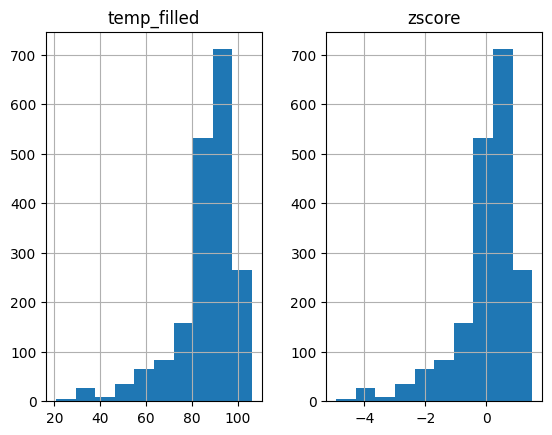

In [47]:
transformed.hist()